<a href="https://colab.research.google.com/github/Buse-cetin/topic_modelling_new/blob/main/LSA_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline  

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

from nltk import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer,LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

stop_words=nltk.corpus.stopwords.words('turkish')
new_stopwords = ['movie','movies','film','love','good','like','best','great','ring','shawshank','films','one','ive','watch','thing']
stop_words.extend(new_stopwords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/unwanted_clean.csv', on_bad_lines='skip')
df=pd.DataFrame(data)
reviews=data[['tweet']]


def clean_text(tweet):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(tweet)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text


In [5]:
data['tweet'] = data['tweet'].astype(str)
df['cleaned_review']=df['tweet'].apply(clean_text)


In [6]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)

In [7]:
vect_text=vect.fit_transform(df['cleaned_review'])

In [8]:
idf=vect.idf_

In [9]:
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)

In [11]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  1.4326902726307305
Topic  1  :  3.0826935316377426
Topic  2  :  18.55891428885224
Topic  3  :  10.283055702487903
Topic  4  :  -5.209270860624891
Topic  5  :  -0.15484885669555426
Topic  6  :  -0.8984679361110535
Topic  7  :  3.609397046353102
Topic  8  :  -1.9530546018193762
Topic  9  :  -0.5656180932187795


In [12]:
print(lsa_model.components_.shape)
print(lsa_model.components_)

(10, 1000)
[[ 0.00267617  0.00091083  0.00168122 ...  0.00078555  0.00286047
   0.0006744 ]
 [ 0.00748052  0.00190992  0.00195501 ...  0.00353978  0.00279313
   0.00234224]
 [ 0.00793842  0.0045384   0.00530671 ...  0.01134388  0.00367865
   0.00353321]
 ...
 [-0.00538228 -0.00232982 -0.00110589 ... -0.0010424  -0.00111164
  -0.00142793]
 [ 0.01245444  0.00365843  0.01216586 ...  0.00307639  0.00862285
   0.00268719]
 [-0.01198856 -0.00336834  0.00088147 ... -0.0096561  -0.00645059
  -0.00441386]]


In [13]:
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
istanbul trafik nişantaşı bakırköy mecidiyeköy şişli taksim beyazmasa istanbultrafik istanbulda 

Topic 1: 
beyazmasa gtgtb belediye iletişimi vatandaşların kurulan birimdir iett saat ulasim 

Topic 2: 
ulasim iett ongun taksi istanbul dolmuş otobüs nişantaşı esnafı ekmek 

Topic 3: 
trafik ulasim ongun taksi iett dolmuş istanbulda saat istanbultrafik esnafı 

Topic 4: 
iett otobüs trafik otobüsü ekrem imamoğlu otobüsleri metro saat sabah 

Topic 5: 
belediye kurulan vatandaşların iletişimi birimdir gtgtb iett başkanı ekrem imamoğlu 

Topic 6: 
ibbtrafik istanbulbld çalışması çizgi milyoniçinçalışıyoruz caddesi mahallesi ilçesi sokak bakırköy 

Topic 7: 
ongun dolmuş ekmek evine götüremiyor bakanımız cakilcioglu esnafı ekrem taksi 

Topic 8: 
ekrem imamoğlu başkanı güzel otobüs saat zaman belediye sayın ulaşım 

Topic 9: 
ekrem imamoğlu başkanı iett ulasim beyazmasa taksi nişantaşı ibbtrafik istanbul 



In [14]:
from wordcloud import WordCloud

def draw_word_cloud(index):
  imp_words_topic=""
  comp=lsa_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
 

perplexity_unigram = np.exp(-np.mean(np.log(np.maximum(lsa_top, 1e-10))))
#perplexity_bigram = np.exp(-np.mean(np.log(np.maximum(lsa_bigram, 1e-10))))



print("Unigram LSA Model Perplexity:", perplexity_unigram)
#print("Bigram LSA Model Perplexity:", perplexity_bigram)

Unigram LSA Model Perplexity: 61989.59940366865


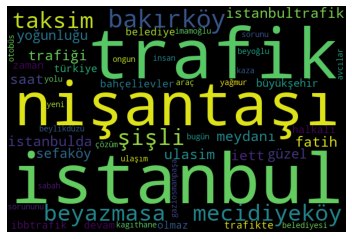

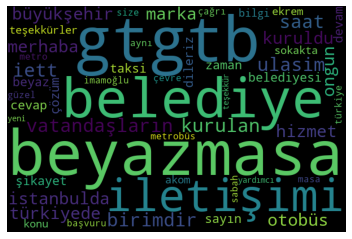

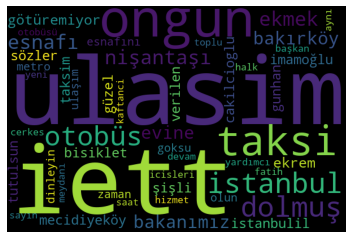

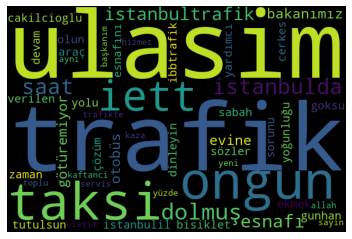

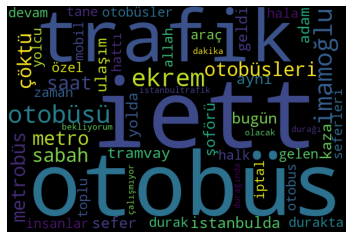

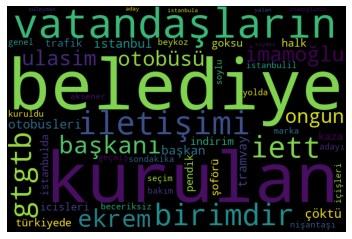

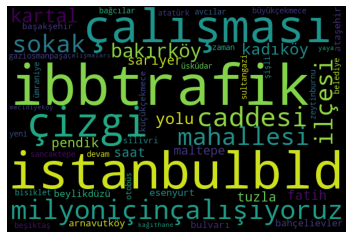

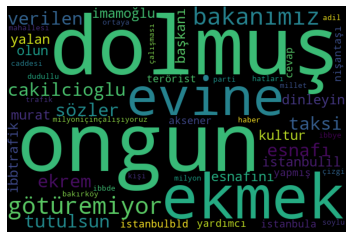

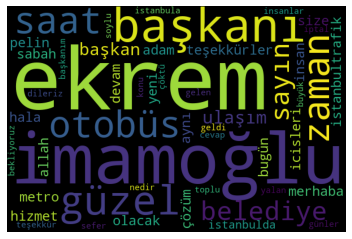

In [15]:
for x in range(0, 9):
  draw_word_cloud(x)
